## Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

## Define Global parameters/ load data file

In [4]:
GJ_coupling = "strong"  # "weak" or "strong"
data_file_name = "Cleft_Seq_data_D_1.0.csv" if GJ_coupling == "strong" else "Cleft_Seq_data_D_0.1.csv"
data_root = "dataset/"
data = pd.read_csv(os.path.join(data_root, data_file_name))
print(data.head())

save_root = data_root + "Strong_GJ_Coupling_full_seq/" if GJ_coupling == "strong" else data_root + "Weak_GJ_Coupling_full_seq/"
if not os.path.exists(save_root):
    os.makedirs(save_root)
data_grouped = data.groupby('Mesh_idx')

   L_current  R_current       Ax_V     L_ax_V     R_ax_V    d  d_ip  d_p  A_f  \
0   0.000001   0.000001 -88.046058 -88.046055 -88.046057  100   0.3  0.1  0.9   
1   0.000001   0.000001 -88.046109 -88.046105 -88.046108  100   0.3  0.1  0.9   
2   0.000001   0.000001 -88.046159 -88.046156 -88.046158  100   0.3  0.1  0.9   
3   0.000001   0.000001 -88.046210 -88.046206 -88.046209  100   0.3  0.1  0.9   
4   0.000001   0.000001 -88.046260 -88.046256 -88.046259  100   0.3  0.1  0.9   

   h_ip  Ggap  Mesh_idx  t_save  
0    32   735       100  8949.6  
1    32   735       100  8950.0  
2    32   735       100  8950.4  
3    32   735       100  8950.8  
4    32   735       100  8951.2  


## Group data by mesh index/show the data

## Test find peak

In [4]:
def find_peak_slice(array, threshold: float = -88.0):
    n = len(array)
    if n == 0:
        raise ValueError("Array is empty")
    
    array = np.asarray(array)
    above = np.where(array > threshold)[0]
    if len(above) == 0:
        return None
    start_idx = int(above[0])
    end_idx = int(above[-1])
    return slice(start_idx, end_idx + 1)

L_range: slice(384, 534, None), R_range: slice(394, 515, None)


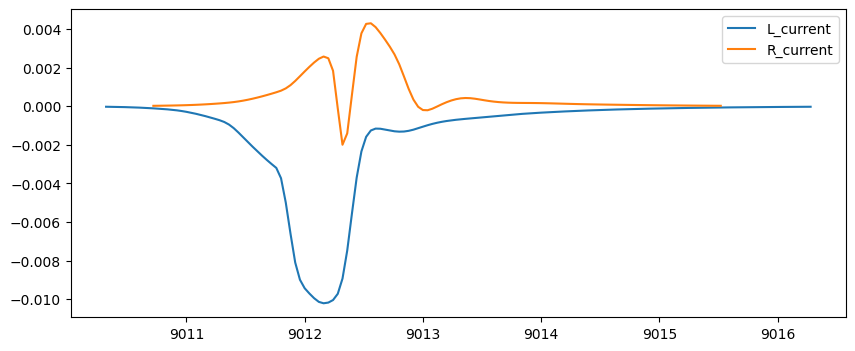

In [5]:
test = 0
for mesh_idx, group in data_grouped:
    T = np.array(group['t_save'].values)
    L_current = np.array(group['L_current'].values)
    R_current = np.array(group['R_current'].values)
    L_thresh = np.quantile(-L_current, 0.96).astype(float)
    R_thresh = np.quantile(R_current, 0.97).astype(float)
    L_range = find_peak_slice(-L_current, threshold=L_thresh)
    R_range = find_peak_slice(R_current, threshold=R_thresh)
    if L_range is None or R_range is None:
        continue
    if mesh_idx == 256:
        print(f"L_range: {L_range}, R_range: {R_range}")
        plt.figure(figsize=(10, 4))
        plt.plot(T[L_range], L_current[L_range], label='L_current')
        plt.plot(T[R_range], R_current[R_range], label='R_current')
        plt.legend()
        plt.show()
    test += 1
    

## Sort data by peak duration

In [5]:
test = 0
for mesh_idx, group in data_grouped:
    # T = np.array(group['t_save'].values)
    # L_current = np.array(group['L_current'].values)
    # R_current = np.array(group['R_current'].values)
    # L_thresh = np.quantile(-L_current, 0.96).astype(float)
    # R_thresh = np.quantile(R_current, 0.96).astype(float)
    # L_range = find_peak_slice(-L_current, threshold=L_thresh)
    # R_range = find_peak_slice(R_current, threshold=R_thresh)
    # if L_range is None or R_range is None:
    #     raise ValueError(f"No peak found for Mesh_idx: {mesh_idx}")
    # Frange = slice(min(L_range.start, R_range.start), max(L_range.stop, R_range.stop))
    # new_data = group.iloc[Frange]
    mesh_idx = group['Mesh_idx'].values[0]
    group.to_csv(os.path.join(save_root, f"Mesh_idx_{mesh_idx}_full_seq.csv"), index=False)

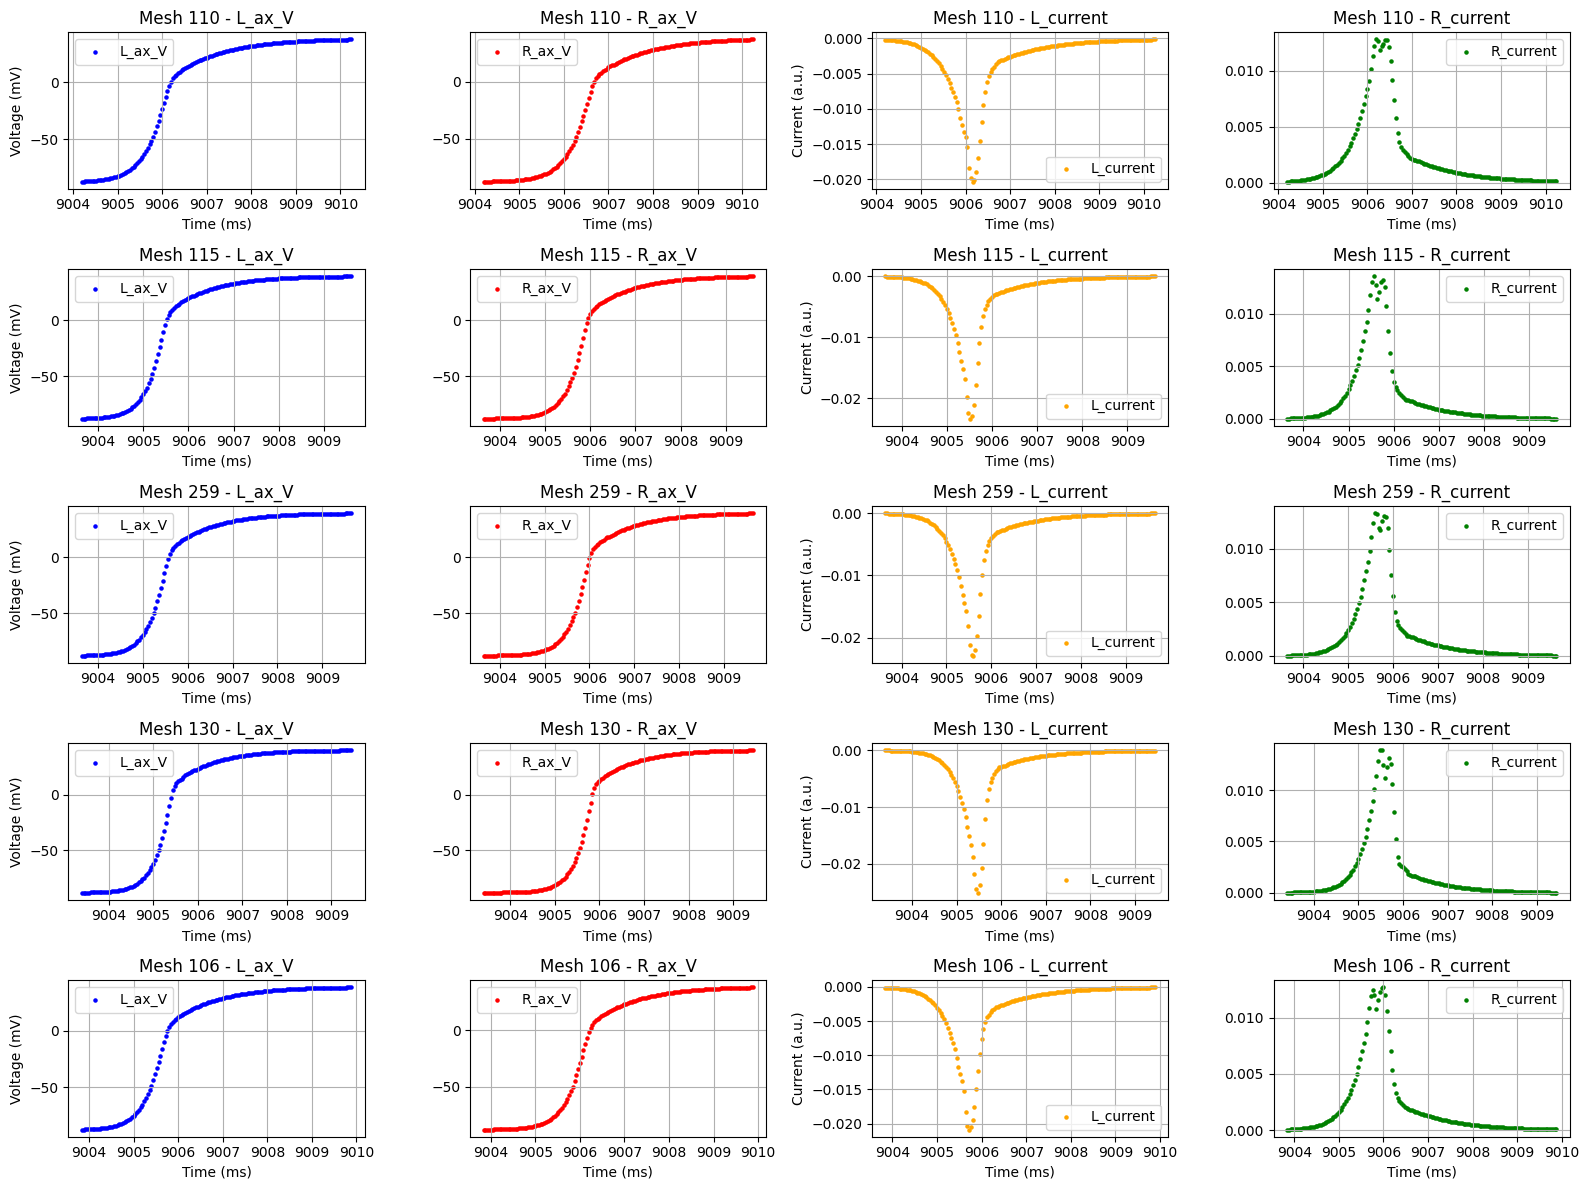

In [8]:
fig, axes = plt.subplots(5, 4, figsize=(16, 12))  # 5组数据 × 4列（每列一个量）
axes = axes.reshape(5, 4)
GJ_coupling = "strong"  # "weak" or "strong"
data_root = "dataset/"
save_root = data_root + "Strong_GJ_Coupling/" if GJ_coupling == "strong" else data_root + "Weak_GJ_Coupling/"
if not os.path.exists(save_root):
    os.makedirs(save_root)
# idx_list = []
for i in range(5):
    # 随机选取一个 Mesh_idx
    idx = np.random.randint(1, 385)
    # idx_list.append(idx)
    # idx = idx_list[i]
    data = pd.read_csv(os.path.join(save_root, f"Mesh_idx_{idx}.csv"))

    # 取数据
    T = np.array(data['t_save'].values)
    L_voltage = np.array(data['L_ax_V'].values)
    R_voltage = np.array(data['R_ax_V'].values)
    L_current = np.array(data['L_current'].values)
    R_current = np.array(data['R_current'].values)

    axes[i, 0].scatter(T, L_voltage, label='L_ax_V', color='blue', s=5)
    axes[i, 0].set_ylabel('Voltage (mV)')
    axes[i, 0].set_title(f'Mesh {idx} - L_ax_V')

    axes[i, 1].scatter(T, R_voltage, label='R_ax_V', color='red', s=5)
    axes[i, 1].set_title(f'Mesh {idx} - R_ax_V')

    axes[i, 2].scatter(T, L_current, label='L_current', color='orange', s=5)
    axes[i, 2].set_ylabel('Current (a.u.)')
    axes[i, 2].set_title(f'Mesh {idx} - L_current')

    axes[i, 3].scatter(T, R_current, label='R_current', color='green', s=5)
    axes[i, 3].set_title(f'Mesh {idx} - R_current')


    for j in range(4):
        axes[i, j].set_xlabel('Time (ms)')
        axes[i, j].grid(True)
        axes[i, j].legend()

plt.tight_layout()
plt.show()


## Fit gaussian curve for data

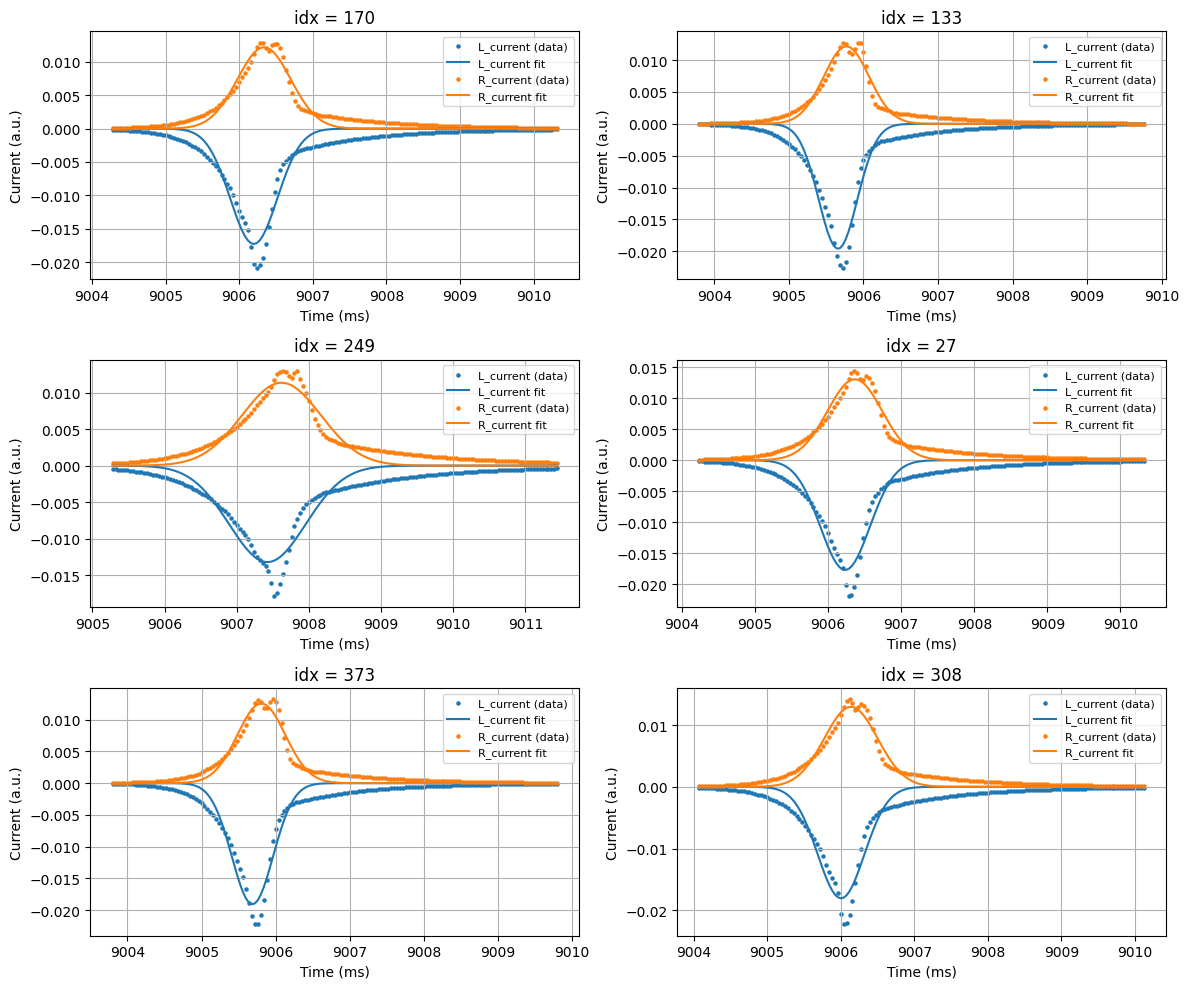

In [9]:
from scipy.optimize import curve_fit

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.reshape(3, 2)
idx_list = []
for i in range(6):
    idx = np.random.randint(1, 385)
    idx_list.append(idx)
    data = pd.read_csv(os.path.join(save_root, f"Mesh_idx_{idx}.csv"))

    T = np.array(data['t_save'].values)
    L_current = np.array(data['L_current'].values)
    R_current = np.array(data['R_current'].values)

    ax = axes[i // 2, i % 2]

    # ---------- 拟合 L_current（假设是负峰；用 -L_current 拟合高斯） ----------
    y_L = -L_current
    A0_L = y_L.max() - y_L.min()
    mu0_L = T[np.argmax(y_L)]
    sigma0_L = (T.max() - T.min()) / 10.0 if T.max() > T.min() else 1.0

    try:
        popt_L, _ = curve_fit(
            gaussian, T, y_L,
            p0=[A0_L, mu0_L, sigma0_L],
            maxfev=10000
        )
        y_L_fit = -gaussian(T, *popt_L) 
        fitted_L = True
    except RuntimeError:
        fitted_L = False

    y_R = R_current
    A0_R = y_R.max() - y_R.min()
    mu0_R = T[np.argmax(y_R)]
    sigma0_R = (T.max() - T.min()) / 10.0 if T.max() > T.min() else 1.0

    try:
        popt_R, _ = curve_fit(
            gaussian, T, y_R,
            p0=[A0_R, mu0_R, sigma0_R],
            maxfev=10000
        )
        y_R_fit = gaussian(T, *popt_R)
        fitted_R = True
    except RuntimeError:
        fitted_R = False

    ax.scatter(T, L_current, s=5, label='L_current (data)')
    if fitted_L:
        ax.plot(T, y_L_fit, linewidth=1.5, label='L_current fit')

    ax.scatter(T, R_current, s=5, label='R_current (data)')
    if fitted_R:
        ax.plot(T, y_R_fit, linewidth=1.5, label='R_current fit')

    ax.set_title(f'idx = {idx}')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Current (a.u.)')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()
    

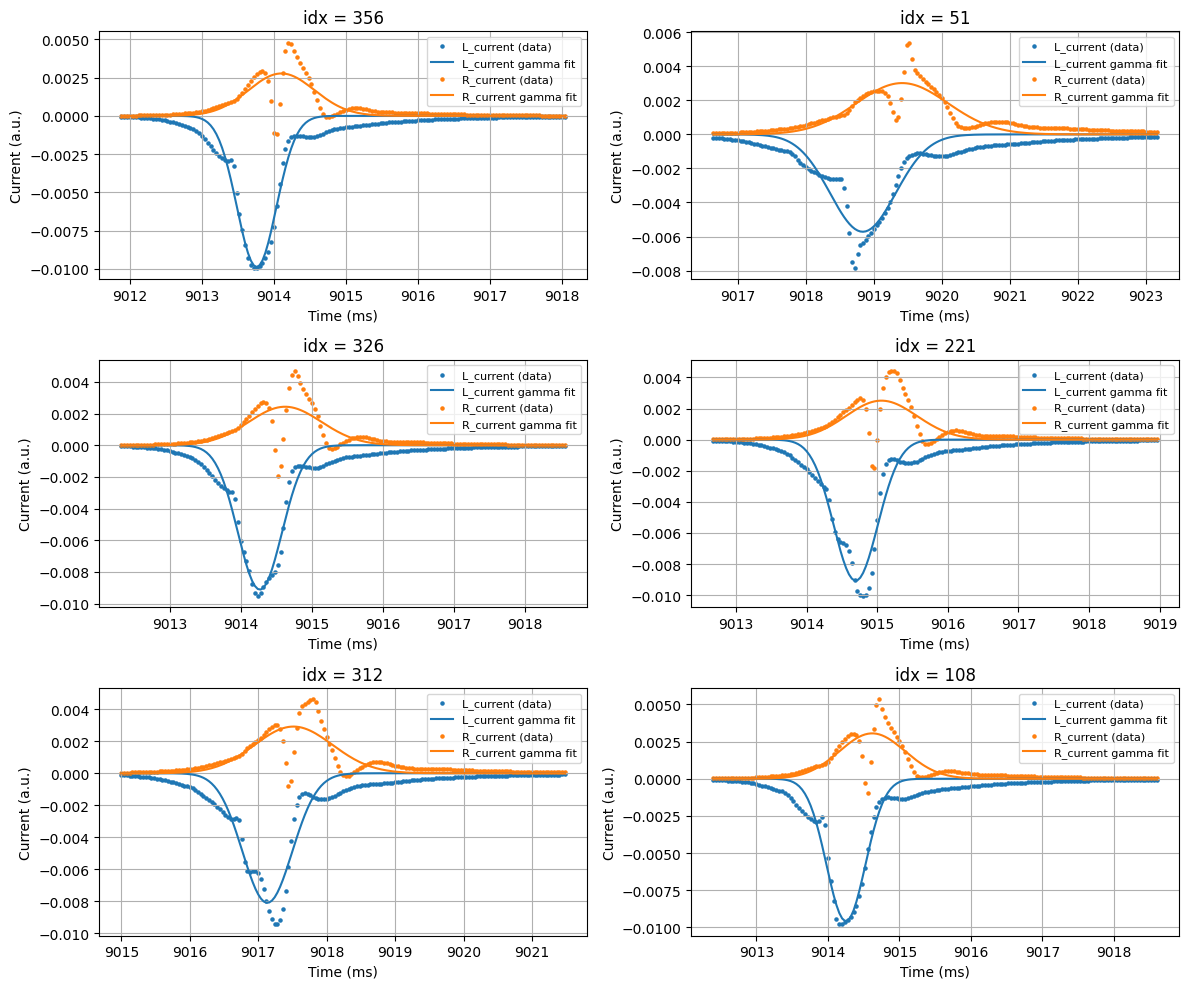

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import gamma as gamma_dist, levy_stable

def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

def fit_curve(T, y, fit_method='gauss'):
    """
    用给定的分布形状对 (T, y) 做曲线拟合
    fit_method: 'gauss', 'gamma', 'alpha'
    返回 y_fit, fitted(bool)
    """
    T = np.asarray(T)
    y = np.asarray(y)

    # 防止 T 全相等
    t_min, t_max = float(T.min()), float(T.max())
    if t_max == t_min:
        return None, False

    A0 = float(y.max() - y.min())

    if fit_method == 'gauss':
        # 高斯峰 A * exp(-(t-mu)^2/(2 sigma^2))
        mu0 = T[np.argmax(y)]
        sigma0 = (t_max - t_min) / 10.0 or 1.0

        def model(x, A, mu, sigma):
            return gaussian(x, A, mu, sigma)

        p0 = [A0, mu0, sigma0]

    elif fit_method == 'gamma':
        # A * Gamma.pdf(t; k, loc, scale)
        k0 = 2.0
        loc0 = t_min
        scale0 = (t_max - t_min) / 5.0 or 1.0

        def model(x, A, k, loc, scale):
            return A * gamma_dist.pdf(x, k, loc=loc, scale=scale)

        p0 = [A0, k0, loc0, scale0]

    elif fit_method == 'alpha':
        # A * levy_stable.pdf(t; alpha, beta, loc, scale)
        alpha0 = 1.5
        beta0 = 0.0
        loc0 = (t_min + t_max) / 2.0
        scale0 = (t_max - t_min) / 5.0 or 1.0

        def model(x, A, a, b, loc, scale):
            return A * levy_stable.pdf(x, a, b, loc=loc, scale=scale)

        p0 = [A0, alpha0, beta0, loc0, scale0]

    else:
        raise ValueError(f"Unknown fit_method: {fit_method}")

    try:
        popt, _ = curve_fit(model, T, y, p0=p0, maxfev=20000)
        y_fit = model(T, *popt)
        return y_fit, True
    except RuntimeError:
        return None, False


# ================= 主绘图代码 =================
fit_method = 'gamma'   # 'gauss', 'gamma', 'alpha'

fig, axes = plt.subplots(3, 2, figsize=(12, 10))
axes = axes.reshape(3, 2)

for i in range(6):
    idx = idx_list[i]
    data = pd.read_csv(os.path.join(save_root, f"Mesh_idx_{idx}.csv"))

    T = np.array(data['t_save'].values)
    L_current = np.array(data['L_current'].values)
    R_current = np.array(data['R_current'].values)

    ax = axes[i // 2, i % 2]

    # ------- L_current：负峰，先取反做正峰来拟合 --------
    y_L = -L_current
    y_L_fit, fitted_L = fit_curve(T, y_L, fit_method=fit_method)
    if fitted_L:
        y_L_fit_plot = -y_L_fit  # 再改回负号画图

    # ------- R_current：正峰 --------
    y_R = R_current
    y_R_fit, fitted_R = fit_curve(T, y_R, fit_method=fit_method)

    # ------- 画图 --------
    ax.scatter(T, L_current, s=5, label='L_current (data)')
    if fitted_L:
        ax.plot(T, y_L_fit_plot, linewidth=1.5, label=f'L_current {fit_method} fit')

    ax.scatter(T, R_current, s=5, label='R_current (data)')
    if fitted_R:
        ax.plot(T, y_R_fit, linewidth=1.5, label=f'R_current {fit_method} fit')

    ax.set_title(f'idx = {idx}')
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Current (a.u.)')
    ax.legend(fontsize=8)
    ax.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import glob

GJ_coupling = "weak"  # "weak" or "strong"
data_root = "dataset/"
save_root = data_root + "Strong_GJ_Coupling/" if GJ_coupling == "strong" else data_root + "Weak_GJ_Coupling/"
file_paths = glob.glob(os.path.join(save_root, "*.csv"))
df_list = [pd.read_csv(fp) for fp in file_paths]
big_df = pd.concat(df_list, ignore_index=True)
big_df.to_csv(os.path.join(save_root, "Weak_GJ_all.csv"), index=False)